In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv("results_raw_outside.csv")

In [4]:
modelnames = ["kNN", "Linear", "3 Layer FC", "4 Layer FC", "5 Layer FC", "1-Channel CNN", "2-Channel CNN", "3-Channel CNN", "4-Channel CNN"]


In [5]:
raw_data["q0_error"] = np.rad2deg(raw_data.true_q0 - raw_data.pred_q0)
raw_data["q3_error"] = np.rad2deg(raw_data.true_q3 - raw_data.pred_q3)
raw_data["abs_q0_error"] = np.abs(raw_data.q0_error)
raw_data["abs_q3_error"] = np.abs(raw_data.q3_error)
raw_data["error"] = np.sqrt(raw_data.q0_error**2 + raw_data.q3_error**2)

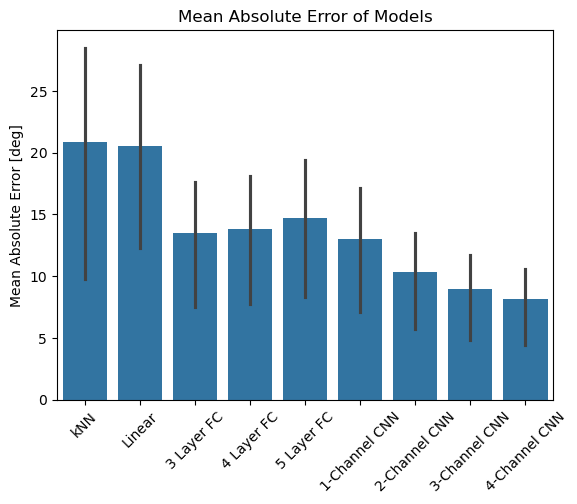

In [56]:
ax = sns.barplot(data=raw_data, x="model_id", y="error", errorbar=("pi", 50))
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
plt.title("Mean Absolute Error of Models")
plt.gca().xaxis.set_major_formatter(lambda x,_: modelnames[int(x)])

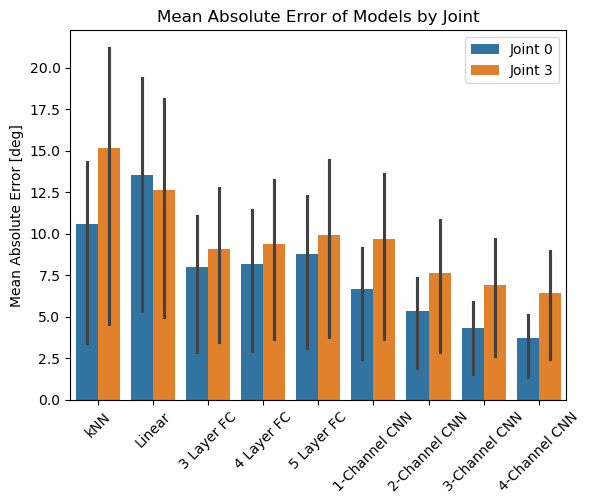

In [62]:
error_longform = raw_data.rename(columns={"abs_q0_error": "Joint 0", "abs_q3_error": "Joint 3"}).melt(id_vars="model_id", value_vars=["Joint 0", "Joint 3"])
ax = sns.barplot(data=error_longform, x="model_id", y="value", hue="variable", errorbar=("pi",50))#("ci", 99))
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
plt.title("Mean Absolute Error of Models by Joint")
plt.gca().xaxis.set_major_formatter(lambda x,_: modelnames[int(x)])
L=plt.legend()
L.get_texts()[0] = "Joint 0"
L.get_texts()[1] = "Joint 3"

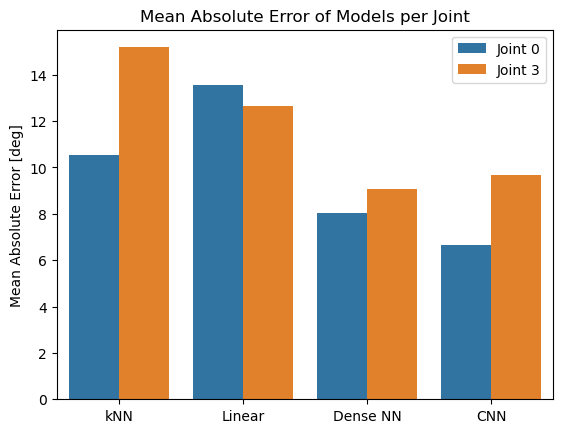

In [69]:
# for presentation
present = [0,1,2,5]
presentnames = ["kNN", "Linear", "Dense NN", "CNN"]
ax = sns.barplot(data=error_longform.loc[error_longform.model_id.isin(present)], x="model_id", y="value", hue="variable", errorbar=None)#("pi", 50))
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
plt.title("Mean Absolute Error of Models per Joint")
plt.gca().xaxis.set_major_formatter(lambda _,pos: presentnames[int(pos)])
plt.legend()


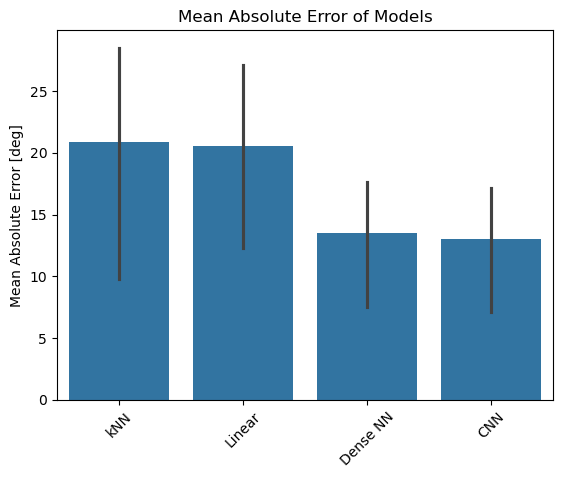

In [67]:
# for presentation
present = [0,1,2,5]
presentnames = ["kNN", "Linear", "Dense NN", "CNN"]
ax = sns.barplot(data=raw_data.loc[raw_data.model_id.isin(present)], x="model_id", y="error", errorbar=("pi", 50))#
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
plt.title("Mean Absolute Error of Models")
plt.gca().xaxis.set_major_formatter(lambda _,pos: presentnames[int(pos)])

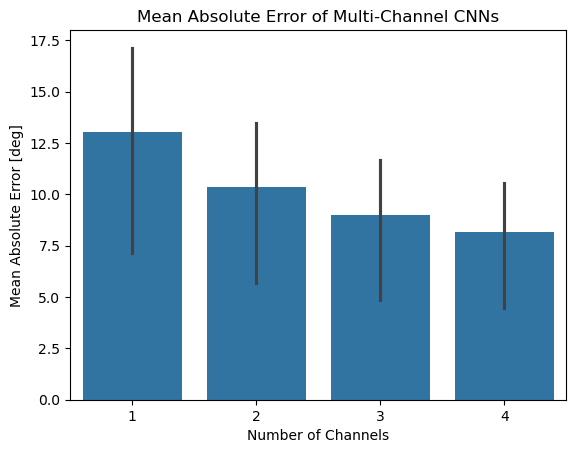

In [72]:
# for presentation
present = [5,6,7,8]
ax = sns.barplot(data=raw_data.loc[raw_data.model_id.isin(present)], x="model_id", y="error", errorbar=("pi", 50))#
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("Number of Channels")
plt.title("Mean Absolute Error of Multi-Channel CNNs")
plt.gca().xaxis.set_major_formatter(lambda _,pos: int(pos)+1)

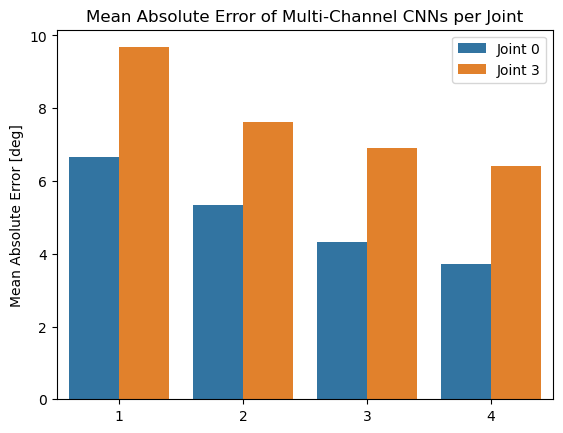

In [73]:
ax = sns.barplot(data=error_longform.loc[error_longform.model_id.isin(present)], x="model_id", y="value", hue="variable", errorbar=None)#("pi", 50))
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
plt.title("Mean Absolute Error of Multi-Channel CNNs per Joint")
plt.gca().xaxis.set_major_formatter(lambda _,pos: int(pos)+1)
plt.legend()

In [48]:
print("modelname     std q0  std q3")
for i in range(len(modelnames)):
    print(f"{modelnames[i]:13}  {np.std(raw_data.loc[raw_data.model_id == i, "q0_error"]): >5.2f}   {np.std(raw_data.loc[raw_data.model_id == i, "q3_error"]): >5.2f}")

modelname     std q0  std q3
kNN            14.74   19.00
Linear         17.16   16.09
3 Layer FC     10.87   11.69
4 Layer FC     11.01   12.05
5 Layer FC     11.72   12.71
1-Channel CNN   9.05   12.62
2-Channel CNN   7.52    9.95
3-Channel CNN   6.29    9.09
4-Channel CNN   5.29    8.51


Text(0.5, 0.98, 'Histogram of errors for selected Models')

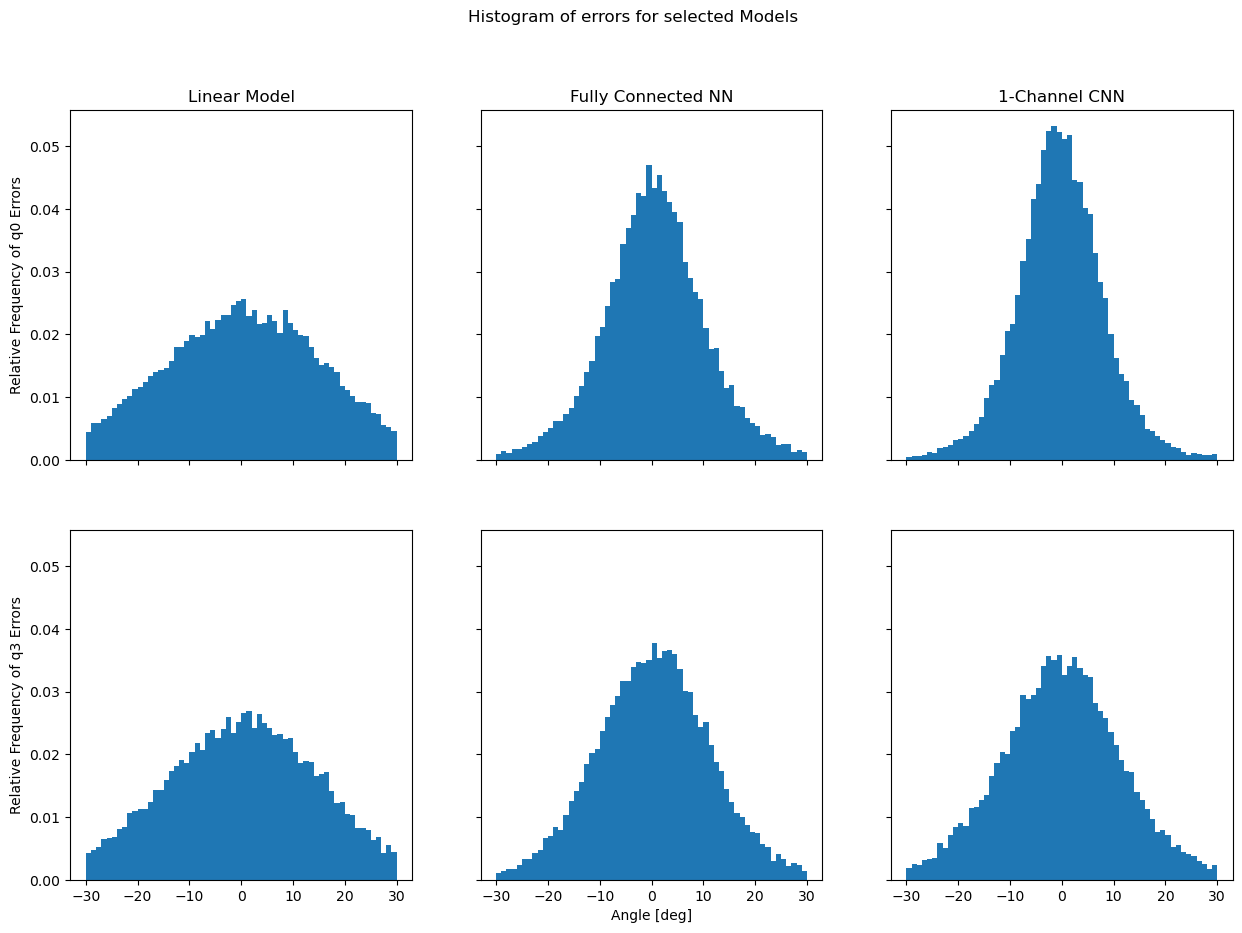

In [20]:
#sns.barplot(data=raw_data, x="q0_error", y="model_id")
datapoints = np.sum(raw_data.model_id == 0)
fig, axs = plt.subplots(2,3, sharex=True, sharey=True, figsize=(15,10))
axs[0,0].hist(x=raw_data.loc[raw_data.model_id==1, "q0_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[0,0].set_ylabel("Relative Frequency of q0 Errors")
axs[0,0].set_title("Linear Model")
axs[0,1].hist(x=raw_data.loc[raw_data.model_id==2, "q0_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[0,1].set_title("Fully Connected NN")
axs[0,2].hist(x=raw_data.loc[raw_data.model_id==5, "q0_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[0,2].set_title("1-Channel CNN")
axs[1,0].hist(x=raw_data.loc[raw_data.model_id==1, "q3_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[1,0].set_ylabel("Relative Frequency of q3 Errors")
axs[1,1].hist(x=raw_data.loc[raw_data.model_id==2, "q3_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[1,1].set_xlabel("Angle [deg]")
axs[1,2].hist(x=raw_data.loc[raw_data.model_id==5, "q3_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
fig.suptitle("Histogram of errors for selected Models")